In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

In [23]:
df = pd.read_csv('bloxberg.csv')
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('datetime')
df = df.drop(['Unnamed: 0'], axis=1)
display(df)


,timestamp,blocknumber,to,from,gas,gasPrice,nonce,value
datetime,,,,,,,,
2019-01-10 08:04:45,1547107485,33,NaN,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088,889637,0,0,0
2019-01-10 08:07:05,1547107625,61,NaN,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088,1952182,0,1,0
2019-01-10 08:08:00,1547107680,72,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088,45333,0,2,0
2019-01-10 09:14:35,1547111675,845,0x9849379b89aB24c18C8871d56d1Ad41E00d9eAae,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088,1000000,50000000000,3,0
2019-01-10 09:15:45,1547111745,859,0x9849379b89aB24c18C8871d56d1Ad41E00d9eAae,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088,1000000,50000000000,4,0
...,...,...,...,...,...,...,...,...
2020-08-15 11:10:05,1597489805,7535649,0xD216153c06E857cD7f72665E0aF1d7D82172F494,0x4eD1cA7563Ae29FE02d278a3fEE4876C9BA317d3,52216,1000000,13721,0
2020-08-15 11:19:10,1597490350,7535715,0xFe19CA9dCaba073cECeE7dC2b36b7d45dbeEdFf0,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088,30000,1000000000,53651,200000000000000000
2020-08-15 11:19:25,1597490365,7535717,0xD216153c06E857cD7f72665E0aF1d7D82172F494,0x4eD1cA7563Ae29FE02d278a3fEE4876C9BA317d3,52276,1000000,13722,0


In [24]:
display("Number of transactions: {}".format(len(df.index)))
delta = df.tail(1).index - df.head(1).index
tx_ratio = len(df.index) / delta.total_seconds()

display("Transactions per Second: {}".format(tx_ratio[0]))

'Number of transactions: 9527286'

'Transactions per Second: 0.18909704751895726'

In [25]:
monthly_tx = df.blocknumber.resample('M').count()

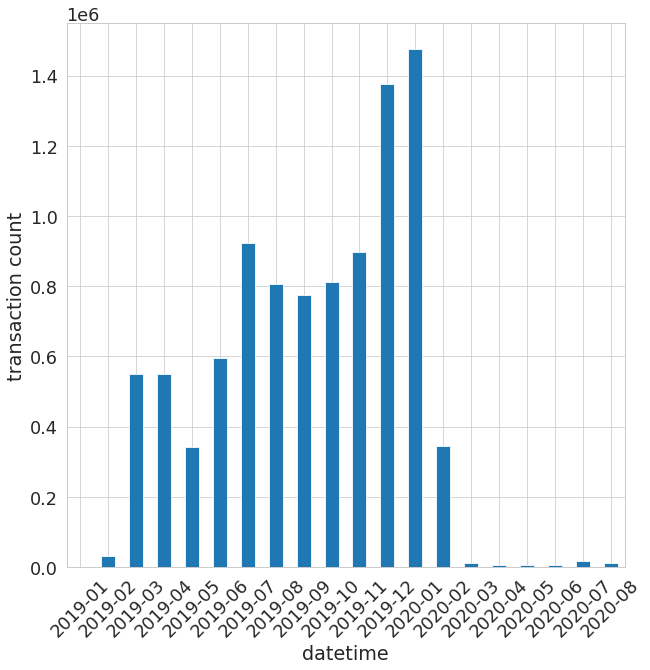

In [33]:
ax = monthly_tx.plot.bar(ylabel="transaction count", xlabel="month", rot=45, figsize=(10,10))
ax.set_xticklabels([pandas_datetime.strftime("%Y-%m") for pandas_datetime in monthly_tx.index])
ax.figure.savefig('figures/all_transactions.png', bbox_inches = "tight")

<AxesSubplot:xlabel='datetime'>

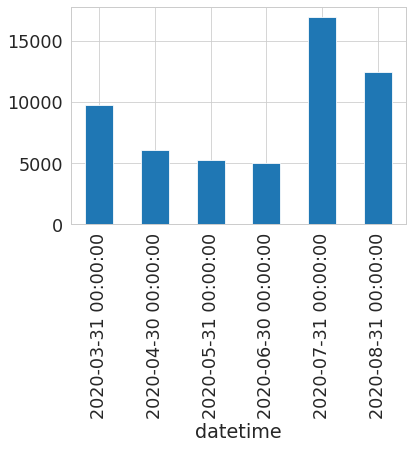

In [34]:
monthly_tx[monthly_tx.index > '2020-02-29'].plot.bar()

In [35]:
validatorMonitorAddress = "0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA"
df_cleaned = df[df['to'] != validatorMonitorAddress]

In [36]:
display("Number of transactions: {}".format(len(df_cleaned.index)))
delta = df_cleaned.tail(1).index - df_cleaned.head(1).index
tx_ratio = len(df_cleaned.index) / delta.total_seconds()

display("Transactions per Second: {}".format(tx_ratio[0]))

'Number of transactions: 114256'

'Transactions per Second: 0.002267746791827807'

In [37]:
monthly_tx_cleaned = df_cleaned.blocknumber.resample('M').count()

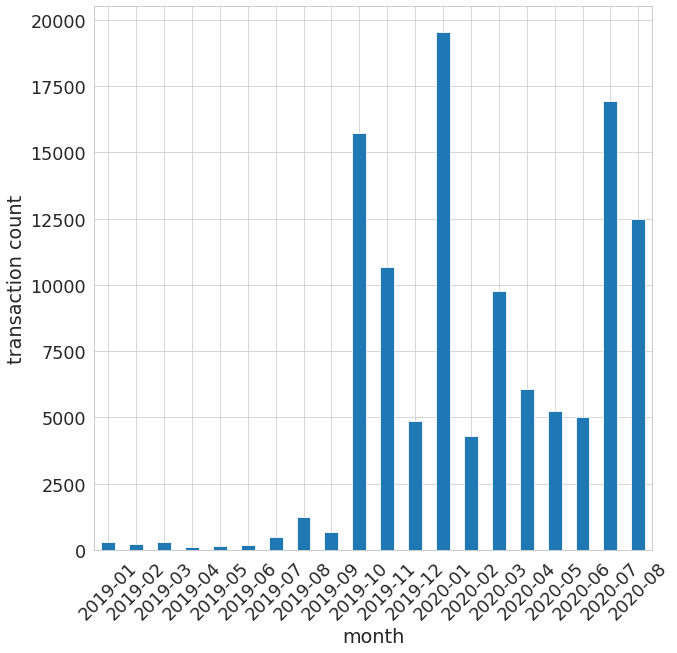

In [38]:

ax = monthly_tx_cleaned.plot.bar(ylabel="transaction count", xlabel="month", rot=45, figsize=(10,10))
ax.set_xticklabels([pandas_datetime.strftime("%Y-%m") for pandas_datetime in monthly_tx_cleaned.index])
ax.figure.savefig('figures/all_transactions_filtered.png', bbox_inches = "tight")